In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pickle as pk
matplotlib.style.use('ggplot') 

In [4]:
df_gff_gene_index = pd.read_pickle('./df.cre.gff.gene.index.pickle')
df_gff_gene       = df_gff_gene_index.reset_index()

In [13]:
df_gff_ath = pd.read_csv('./References/Athaliana/annotation/Athaliana_167_TAIR10.gene.gff3',sep='\t',skiprows=2,header=None)
df_gff_vca = pd.read_csv('./References/Vcateri/annotation/Vcarteri_199_v2.0.gene.gff3',sep='\t',skiprows=2,header=None)

In [6]:
mask = (df_gff_ath[2] == 'gene')
df_gff_gene_ath = df_gff_ath[mask]

In [14]:
mask = (df_gff_vca[2] == 'gene')
df_gff_gene_vca = df_gff_vca[mask]

In [7]:
df_gff_gene_ath = df_gff_gene_ath.reset_index()

In [26]:
df_gff_gene_vca = df_gff_gene_vca.sort([0,3])
df_gff_gene_vca = df_gff_gene_vca.reset_index()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [27]:
df_gff_gene_ath.head()

,index,0,1,2,3,4,5,6,7,8
0,0,Chr1,phytozomev10,gene,3631,5899,.,+,.,ID=AT1G01010.TAIR10;Name=AT1G01010
1,10,Chr1,phytozomev10,gene,5928,8737,.,-,.,ID=AT1G01020.TAIR10;Name=AT1G01020
2,35,Chr1,phytozomev10,gene,11649,13714,.,-,.,ID=AT1G01030.TAIR10;Name=AT1G01030
3,41,Chr1,phytozomev10,gene,23146,31227,.,+,.,ID=AT1G01040.TAIR10;Name=AT1G01040
4,88,Chr1,phytozomev10,gene,31170,33153,.,-,.,ID=AT1G01050.TAIR10;Name=AT1G01050


In [28]:
df_gff_gene_vca.head()

,level_0,index,0,1,2,3,4,5,6,7,8
0,1301,13639,scaffold_1,phytozomev10,gene,25078,28152,.,-,.,ID=Vocar20009522m.g.2.0;Name=Vocar20009522m.g
1,1702,17988,scaffold_1,phytozomev10,gene,31758,33408,.,+,.,ID=Vocar20009939m.g.2.0;Name=Vocar20009939m.g
2,1331,13910,scaffold_1,phytozomev10,gene,34249,40340,.,-,.,ID=Vocar20009552m.g.2.0;Name=Vocar20009552m.g
3,107,1048,scaffold_1,phytozomev10,gene,41020,47800,.,+,.,ID=Vocar20008304m.g.2.0;Name=Vocar20008304m.g
4,938,9925,scaffold_1,phytozomev10,gene,54378,61966,.,+,.,ID=Vocar20009156m.g.2.0;Name=Vocar20009156m.g


In [52]:
df_gff_gene.head()

,genename,0,1,2,3,4,5,6,7,8,ID,length
0,Cre01.g000017,chromosome_1,phytozomev10,gene,18766,20237,.,+,.,ID=Cre01.g000017.v5.5;Name=Cre01.g000017,Cre01.g000017.v5.5,1472
1,Cre01.g000033,chromosome_1,phytozomev10,gene,20356,23957,.,+,.,ID=Cre01.g000033.v5.5;Name=Cre01.g000033,Cre01.g000033.v5.5,3602
2,Cre01.g000050,chromosome_1,phytozomev10,gene,24026,30617,.,+,.,ID=Cre01.g000050.v5.5;Name=Cre01.g000050,Cre01.g000050.v5.5,6592
3,Cre01.g000100,chromosome_1,phytozomev10,gene,30776,41037,.,+,.,ID=Cre01.g000100.v5.5;Name=Cre01.g000100,Cre01.g000100.v5.5,10262
4,Cre01.g000150,chromosome_1,phytozomev10,gene,41896,46547,.,+,.,ID=Cre01.g000150.v5.5;Name=Cre01.g000150,Cre01.g000150.v5.5,4652


In [29]:
def get_intergenic_list(df):
    list_intergenic = []
    for i in df.index:
        try:
            chr_left  = df.loc[i][0] 
            chr_right = df.loc[i+1][0] 
            if chr_left != chr_right:
                continue
            end   = df.loc[i][4]
            start = df.loc[i+1][3]
            list_intergenic.append(start - end)
        except KeyError:
            pass
    return list_intergenic

In [30]:
list_intergenic_cre = get_intergenic_list(df_gff_gene)
list_intergenic_ath = get_intergenic_list(df_gff_gene_ath)
list_intergenic_vca = get_intergenic_list(df_gff_gene_vca)

In [31]:
list_intergenic_vca

[3606,
 841,
 680,
 6578,
 659,
 926,
 1310,
 -1613,
 101,
 272,
 5111,
 1520,
 15724,
 1802,
 1724,
 1647,
 21487,
 18012,
 819,
 1089,
 1417,
 1492,
 305,
 3206,
 1631,
 893,
 14546,
 213,
 11440,
 790,
 1776,
 4549,
 1442,
 469,
 1784,
 15506,
 2272,
 1268,
 1593,
 1457,
 12,
 -666,
 -4953,
 6585,
 3602,
 1604,
 704,
 849,
 2332,
 2052,
 1930,
 334,
 296,
 737,
 2745,
 2695,
 1827,
 2006,
 2905,
 1691,
 1375,
 1092,
 2484,
 2235,
 201,
 15702,
 5663,
 942,
 1863,
 803,
 3469,
 2282,
 369,
 217,
 2689,
 1624,
 27846,
 31813,
 5371,
 1311,
 1090,
 321,
 27,
 566,
 473,
 2065,
 763,
 1169,
 459,
 2744,
 2064,
 358,
 712,
 883,
 486,
 -60,
 -91,
 405,
 201,
 674,
 892,
 2229,
 1739,
 19,
 2185,
 -737,
 420,
 993,
 62,
 1692,
 964,
 278,
 522,
 5480,
 1051,
 629,
 1535,
 503,
 577,
 409,
 8940,
 570,
 504,
 3930,
 1762,
 1288,
 1654,
 521,
 147,
 2181,
 23589,
 2827,
 10900,
 -160,
 464,
 67,
 76,
 2391,
 11161,
 17994,
 31255,
 7690,
 1212,
 54,
 3846,
 6384,
 1431,
 3964,
 14175,
 460,

In [48]:
def get_hist(ax1,array1,xlim,lab):
    a1,b1,c1 = ax1.hist(array1,bins=np.arange(0,max(array1),5),histtype='step',alpha=1,label=lab)
    ax1.set_xlim(0,xlim)
    ax1.set_title('Intergenic region comparison')
    ax1.set_xlabel('Length (bp)')
    ax1.set_ylabel('Count')
    

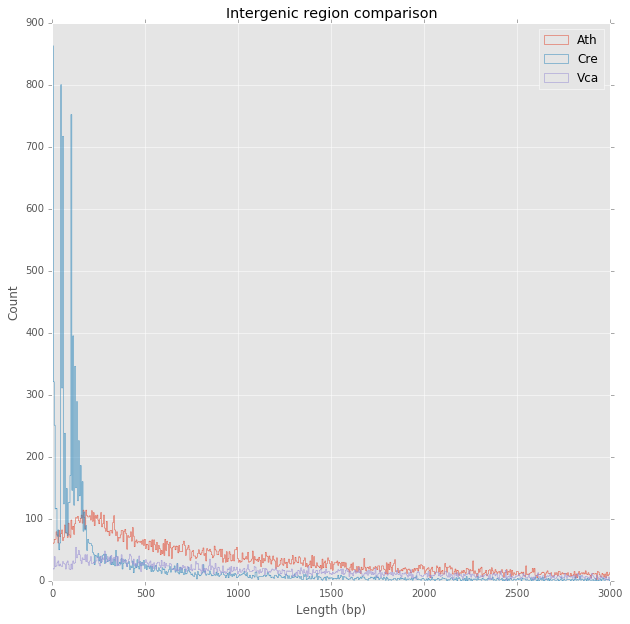

In [50]:
fig, ax1 = plt.subplots(1,figsize=(10,10))
get_hist(ax1,list_intergenic_ath,3000,'Ath')
get_hist(ax1,list_intergenic_cre,3000,'Cre')
get_hist(ax1,list_intergenic_vca,3000,'Vca')
#plt.xlim(0,1000)
plt.legend()

In [53]:
len(df_gff_gene),len(df_gff_gene_ath),len(df_gff_gene_vca)

(17741, 27416, 14971)

In [54]:
len(list_intergenic_cre),len(list_intergenic_ath),len(list_intergenic_vca)

(17689, 27409, 14755)

In [56]:
# overlapped genes showes minus values for intergenic region
def positive_len(x):
    x = np.array(x)
    mask = (x>0)
    return len(x[mask])
positive_len(list_intergenic_cre)

15019

In [57]:
positive_len(list_intergenic_ath)

25590

In [58]:
positive_len(list_intergenic_vca)

14179